In [1]:
from cobaya.run import run

info = {
    "likelihood": {
        "gaussian_mixture": {
            "means": [0.2, 0],
            "covs": [[0.1, 0.05], [0.05, 0.2]],
            "derived": True,
        }
    },
    "params": {
        "a": {"prior": {"min": -0.5, "max": 3}, "latex": r"\alpha"},
        "b": {
            "prior": {"dist": "norm", "loc": 0, "scale": 1},
            "ref": 0,
            "proposal": 0.5,
            "latex": r"\beta",
        },
        "derived_a": {"latex": r"\alpha'"},
        "derived_b": {"latex": r"\beta'"},
    },
    "sampler": {"mcmc": None},
}

updated_info, sampler = run(info)

[mcmc] Getting initial point... (this may take a few seconds)
[prior] Reference values or pdfs for some parameters were not provided. Sampling from the prior instead for those parameters.
[mcmc] Initial point: a:2.433165, b:0
[model] Measuring speeds... (this may take a few seconds)
[model] Setting measured speeds (per sec): {gaussian_mixture: 21300.0}
[prior] *WARNING* Reference pdf not defined or improper for some parameters. Using prior's sigma instead for them.
[mcmc] Covariance matrix not present. We will start learning the covariance of the proposal earlier: R-1 = 30 (would be 2 if all params loaded).
[mcmc] Sampling!
[mcmc] Progress @ 2025-12-13 17:06:00 : 1 steps taken, and 0 accepted.
[mcmc] Learn + convergence test @ 80 samples accepted.
[mcmc]  - Acceptance rate: 0.230
[mcmc]  - Convergence of means: R-1 = 0.152607 after 64 accepted steps
[mcmc]  - Updated covariance matrix of proposal pdf.
[mcmc] Learn + convergence test @ 160 samples accepted.
[mcmc]  - Acceptance rate: 0.

In [3]:
products = sampler.products()
chain = products["sample"]
gd_sample = sampler.products(to_getdist=True)["sample"]


[mcmc] *WARNING* When combining chains, it is recommended to remove some initial fraction, e.g. 'skip_samples=0.3'
[root] *WARNING* outlier fraction 0.06416666666666666 


In [4]:
mean = gd_sample.getMeans()[:2]
cov = gd_sample.getCovMat().matrix[:2, :2]

print(mean)
print(cov)


[ 0.19317266 -0.00781264]
[[0.10065666 0.03885739]
 [0.03885739 0.16560554]]


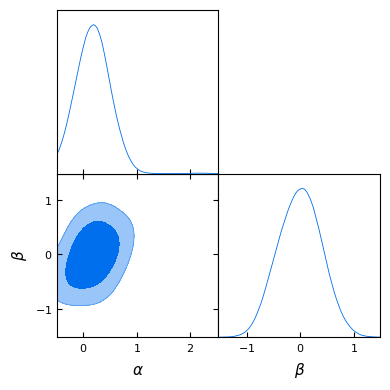

In [5]:
import getdist.plots as gdplt

gdplot = gdplt.get_subplot_plotter()
gdplot.triangle_plot(gd_sample, ["a", "b"], filled=True)
